In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as mdates

In [110]:
import numpy as np
import pandas as pd

In [111]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [112]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [113]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [114]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [115]:
# We can view all of the classes that automap found
print('meausrement calss')
columns_m = inspector.get_columns('measurement')
for c1 in columns_m:
    print(c1["name"],c1["type"])
    
print('-'*50) 

print('station class')
columns_s = inspector.get_columns('station')
for c2 in columns_s:
    print(c2["name"],c2["type"])

meausrement calss
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------------------------------------
station class
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [116]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#find the most recent data date
max_id = session.query(func.max(Measurement.date)).scalar()
max_id
# Calculate the date 1 year ago from the last data point in the database
max_date = dt.date(2017,8,23)
year_ago = max_date - dt.timedelta(days = 365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
pdata = [Measurement.date,Measurement.prcp]
prcp_data = session.query(*pdata).\
 filter(Measurement.date <= max_date).\
    filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data,columns = ['data','prcp']).rename(columns={"data": "date"})



2016-08-23


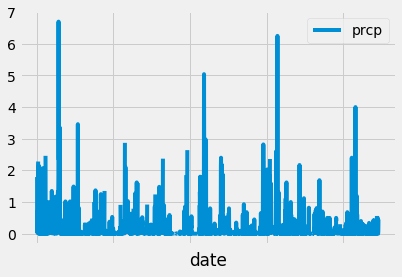

In [131]:
# Sort the dataframe by date
filtered_prcp_df = prcp_df.sort_values(by=['date'])
filtered_prcp_df = filtered_prcp_df.set_index(filtered_prcp_df['date'])
filtered_prcp_df=filtered_prcp_df.sort_index()
filtered_prcp_df.plot(x='date',y='prcp',rot=90)

In [132]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [133]:
# Design a query to show how many stations are available in this datase

stations = session.query(Station).group_by(Station.station).count()
stations

9

In [134]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
staions_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
staions_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [135]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
max = session.query(func.max(Measurement.tobs)).all()
min = session.query(func.min(Measurement.tobs)).all()
avrg = session.query(func.avg(Measurement.tobs)).all()

print(min, max, avrg)

[(53.0,)] [(87.0,)] [(73.09795396419437,)]


In [137]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active = session.query(Measurement.station, Station.name, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()

tdata = [Measurement.date, Measurement.tobs, Measurement.station]

temp_data = session.query(*tdata).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date <= max_date).\
    filter(Measurement.date >= year_ago).all()

temp_data

[('2016-08-23', 77.0, 'USC00519281'),
 ('2016-08-24', 77.0, 'USC00519281'),
 ('2016-08-25', 80.0, 'USC00519281'),
 ('2016-08-26', 80.0, 'USC00519281'),
 ('2016-08-27', 75.0, 'USC00519281'),
 ('2016-08-28', 73.0, 'USC00519281'),
 ('2016-08-29', 78.0, 'USC00519281'),
 ('2016-08-30', 77.0, 'USC00519281'),
 ('2016-08-31', 78.0, 'USC00519281'),
 ('2016-09-01', 80.0, 'USC00519281'),
 ('2016-09-02', 80.0, 'USC00519281'),
 ('2016-09-03', 78.0, 'USC00519281'),
 ('2016-09-04', 78.0, 'USC00519281'),
 ('2016-09-05', 78.0, 'USC00519281'),
 ('2016-09-06', 73.0, 'USC00519281'),
 ('2016-09-07', 74.0, 'USC00519281'),
 ('2016-09-08', 80.0, 'USC00519281'),
 ('2016-09-09', 79.0, 'USC00519281'),
 ('2016-09-10', 77.0, 'USC00519281'),
 ('2016-09-11', 80.0, 'USC00519281'),
 ('2016-09-12', 76.0, 'USC00519281'),
 ('2016-09-13', 79.0, 'USC00519281'),
 ('2016-09-14', 75.0, 'USC00519281'),
 ('2016-09-15', 79.0, 'USC00519281'),
 ('2016-09-16', 78.0, 'USC00519281'),
 ('2016-09-17', 79.0, 'USC00519281'),
 ('2016-09-1

In [138]:
tobs_df = pd.DataFrame(temp_data, columns=['date','tobs','station'])
tobs = tobs_df['tobs']
tobs_df.head()

,date,tobs,station
0,2016-08-23,77.0,USC00519281
1,2016-08-24,77.0,USC00519281
2,2016-08-25,80.0,USC00519281
3,2016-08-26,80.0,USC00519281
4,2016-08-27,75.0,USC00519281


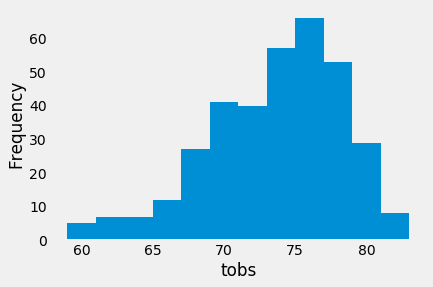

In [139]:
plt.hist(tobs, bins=12)
plt.xlabel('tobs')
plt.ylabel('Frequency')
plt.grid()
plt.show()

## Bonus Challenge Assignment

In [140]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
